#Install and Import Devcloud library

In [ ]:
%pip install devcloud --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple 

from devcloud import Devcloud

#Login to Devcloud
Requires token to login, user needs to acquire it from https://frontend.apps.cfa.devcloud.intel.com/

Once logged-in open click on the User Profile at the top right corner and select **Copy API Token** once done a modal appear and on click of **Copy** button the token is copied to clipboard

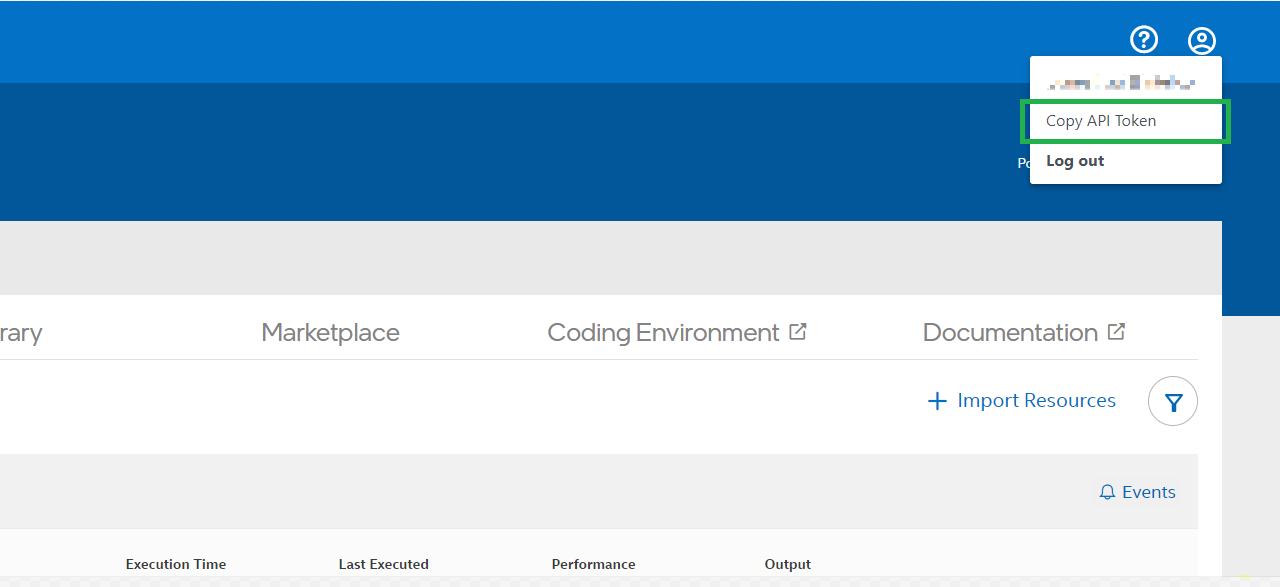

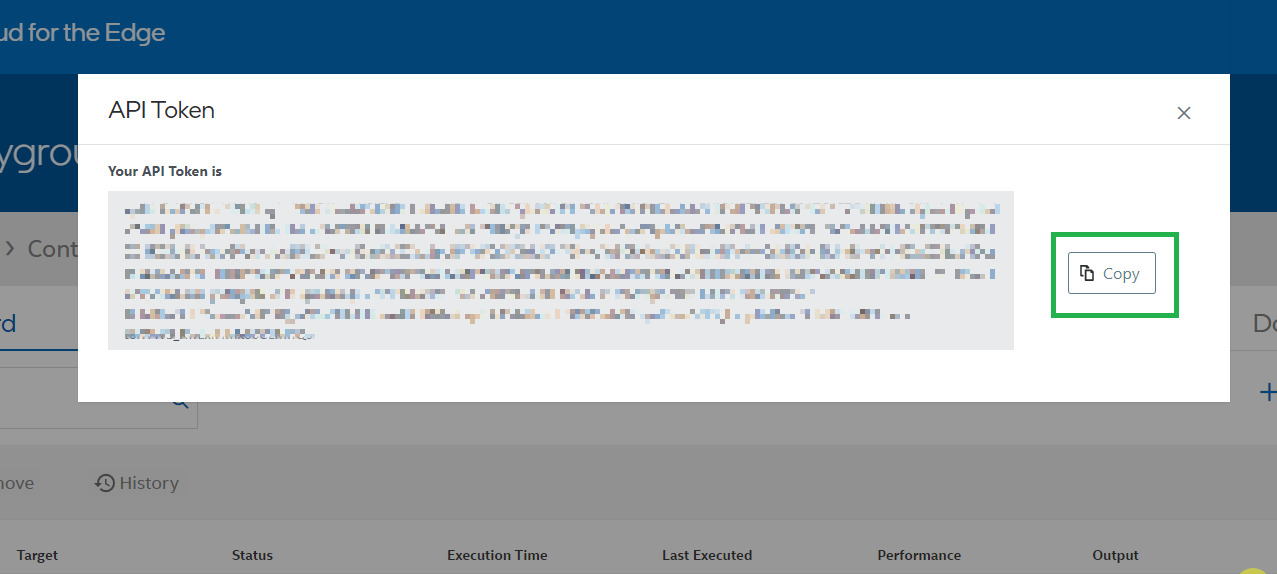

## Connecting to Devcloud

Once user has the token taken from the above step. Please input it to below connect API 



```
Devcloud.connect()
args: None
return None
Need to enter token when prompted
```



In [2]:
Devcloud.connect()

Token:··········
LoggedIn
Overview - Project
+----------+--------------+--------------------------------+----------------------------------------------------+
|   Sr.No. |   project_id |              Name              |                    Description                     |
+==========+==============+================================+====================================================+
|        1 |       630605 |           project12            |                                                    |
+----------+--------------+--------------------------------+----------------------------------------------------+
|        2 |       607966 |        instrumentation         |                                                    |
+----------+--------------+--------------------------------+----------------------------------------------------+
|        3 |       586481 | tiny-yolo-v3-object-detection  |   Convert a pre-trained DarkNet YOLO V3 model to   |
|          |              |                

#Transfer training model from AWS S3 to Devcloud



```
Devcloud.transfer(region: str, bucketName: str, path: List, accessKey: str="", secretKey: str="")
args:
region: str - AWS bucket region
bucketName: str - Name of the bucket
path: str - file/folder path present relative to the bucket to be copied to devcloud
accessKey: str (Optional) - Access key of AWS S3 bucket
secretKey: str (Optional) - Secret key of AWS S3 bucket

If access and secret key isn't entered, then user will be prompted to enter
```

More detail on this feature is present in 
[Developer Guide](https://www.intel.com/content/www/us/en/develop/documentation/devcloud-containers/top/enable-cloud-storage.html)

Files used: [run.sh](https://github.com/intel/DevCloudContent-git/blob/inference-to-training/training-to-inference/run.sh)
[unet_kits19.xml,unet_kits19.bin](https://github.com/openvinotoolkit/openvino_notebooks/tree/main/notebooks/210-ct-scan-live-inference/pretrained_model)

In [3]:
Devcloud.transfer("ap-south-1","train2infer-apac",["unet_kits19.mapping","unet_kits19.xml","unet_kits19.bin","run.sh"])

Access Key:··········
Secret Key:··········
Successfully connected to S3
Successfully import from S3


#List the available Intel's latest and greatest hardware



```
Devcloud.availableHardware()
args: None
return: None

Prints available hardware and their respective ID, Processor Name, Integrated GPU Name and Memory detail
```

For more detail on available edge node detail [Available Hardware](https://www.intel.com/content/www/us/en/develop/documentation/devcloud-containers/top/available-hardware.html)

In [4]:
Devcloud.availableHardware()

Unexpected Error
 <bound method Response.json of <Response [200]>>
+------+-------------------------------------------+--------------------------------+----------+
|   Id |               processorName               |       integratedGpuName        |  memory  |
+======+===========================================+================================+==========+
|    1 |      Intel®  Xeon® D-2712T Processor      |              None              |   64GB   |
+------+-------------------------------------------+--------------------------------+----------+
|    2 |  Intel®  Xeon® Platinum-8357B Processor   |              None              |   64GB   |
+------+-------------------------------------------+--------------------------------+----------+
|    3 |  Intel® Gen11 Core™ i7-1185GRE Processor  |    Intel® Iris® Xe Graphics    |  16 GB   |
+------+-------------------------------------------+--------------------------------+----------+
|    4 |   Intel® Gen9 Core™ i7-9750H Processor    |    Inte


#Create a container



```
Devcloud.createContainer(projectName: str, containerName: str, url: str)
Creates container image and stores in the devcloud
arg: 
projectName: str - Unique name of the project
containerName: str - Unique name of the container
url: str - Container image URL
returns: None
```



In [5]:
PROJECT_NAME="project12"
CONTAINER_NAME="container12"
Devcloud.createContainer(PROJECT_NAME, CONTAINER_NAME, "docker.io/openvino/openvino_tensorflow_ubuntu20_runtime")

Project project12 created!.
container container12 created!.


#Configure the container
Uses the transferred files from the AWS S3 and run the start script



```
Devcloud.configureContainer(projectName: str, containerName: str, port: list, label: list, entryScript: str, output: str, mountPoint: list, environment: str)
Configures the container with various option as mentioned below
arg:
projectName: str - Name of the project under which container present
containerName: str - Name of the container which needs to configured (This should be assigned to the project name mentioned above)
port: list[int] - Port number which must be exposed to external consumption. Port range must be above 1024 
label: list[str] - Label to be associated to the container
entryScript: str - Initial file which must be executed when container boots up
output: str - Output mount folder, which can be later accessed using Devcloud file system
mountPoint: list[(str, str)] - To mount Devcloud file system to user's container. This is a tuple, were first one is for Devcloud file system path and second is mount point in container. Multiple such mount path can be assigned
environment: str - environment variable to be passed to container. eg., -e token=XYZ 
```



In [6]:
Devcloud.configureContainer(PROJECT_NAME, CONTAINER_NAME, [], [], "/s3/run.sh", "/mount_folder", [("/s3/train2infer", "/s3")], "")


Updated the configuration!!


#Lauch the container with the hardware selection from the above table



```
Devcloud.launch(projectName: str, edgeNode: int)
Launches the Project against the selected hardward

projectName: str - Name of the project which should be lauched
edgeNode: int - Intel's latest and greatest hardware to be used. Get the list by calling Devcloud.availableHardware()
```



In [22]:
Devcloud.launch(PROJECT_NAME, 18)

successfully launched!!


#Check the status of the project



```
Devcloud.getStatus()

Displays launched project status
```



In [30]:
Devcloud.getStatus(projectName=PROJECT_NAME, output="wide")

+-----------+-----------------+------------+------------------+---------------------+-------+--------------+
|  project  |     target      |   status   |   execution time |     create time     |  fps  |  Throughput  |
+===========+=================+============+==================+=====================+=======+==============+
| project12 | Xeon Gold-6212U | TERMINATED |              148 | 2023-01-06 11:26:13 | 24.24 |     2.85     |
+-----------+-----------------+------------+------------------+---------------------+-------+--------------+
| project12 | Xeon Gold-6212U | TERMINATED |              344 | 2023-01-06 11:15:38 | None  | Unavailable  |
+-----------+-----------------+------------+------------------+---------------------+-------+--------------+


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


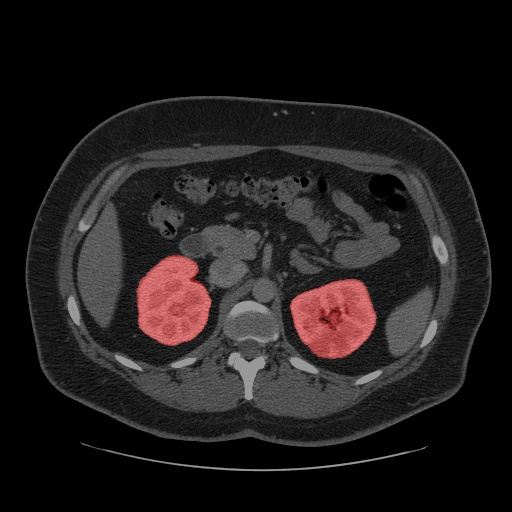

In [31]:
%pip install Pillow
import IPython.display
import PIL.Image
from PIL import Image
from io import StringIO
import io
res = Devcloud.getFilesPreview(PROJECT_NAME, "output/inference/24_inference.jpeg")
image_bytes = io.BytesIO(res.read())
img = PIL.Image.open(image_bytes)
IPython.display.display(img)

#Benchmarking

Benchmarking your model. More information on benchmarking [Openvino Benchmarking](https://docs.openvino.ai/latest/openvino_inference_engine_tools_benchmark_tool_README.html)


Files used: Files used: [run.sh](https://github.com/intel/DevCloudContent-git/blob/inference-to-training/training-to-inference/run.sh) 
[unet_kits19.xml,unet_kits19.bin](https://github.com/openvinotoolkit/openvino_notebooks/tree/main/notebooks/210-ct-scan-live-inference/pretrained_model) [benchmark_run.sh](https://github.com/intel/DevCloudContent-git/blob/inference-to-training/training-to-inference/benchmark_run.sh)


In [ ]:
BENCHMARK_PROJECT = "benchmark2"
BENCHMARK_CONTAINER = "benchmarkcontainer2"

Devcloud.transfer("us-west-2","train2infer",["unet_kits19.mapping","unet_kits19.xml","unet_kits19.bin","run.sh", "benchmark_run.sh"])
Devcloud.createContainer(BENCHMARK_PROJECT, BENCHMARK_CONTAINER, "docker.io/openvino/ubuntu20_dev")

Access Key:··········
Secret Key:··········
Successfully connected to S3
Successfully import from S3
Project name already exist: benchmark1
Container name already exists. Please enter a unique name


In [ ]:
Devcloud.configureContainer(BENCHMARK_PROJECT, BENCHMARK_CONTAINER, [], [], "/s3/benchmark_run.sh", "/mount_folder", [("/s3/train2infer", "/s3")], "")


Updated the configuration!!


In [ ]:
Devcloud.launch(BENCHMARK_PROJECT, 18)

successfully launched!!


In [ ]:
res = Devcloud.previewOutput("/data/benchmark1/Xeon-Gold-6212U/TS-1666885615899/benchmark_report.csv",type='csv')


In [ ]:
import csv
decoded_content = res.read().decode('utf-8')

cr = csv.reader(decoded_content.splitlines(), delimiter=';')
my_list = list(cr)
for row in my_list:
    print(row)

['Command line parameters']
['-m', '/s3/unet_kits19.xml']
['-report_folder', '/mount_folder']
['-report_type', 'detailed_counters']
[]
['Configuration setup']
['topology', 'Model1']
['target device', 'CPU']
['API', 'async']
['inference_only', 'True']
['precision', 'UNSPECIFIED']
['batch size', '1']
['number of iterations', 'None']
['number of parallel infer requests', '12']
['duration (ms)', '60000']
['number of CPU streams', '12']
[]
['Execution results']
['read network time (ms)', '41.38']
['load network time (ms)', '215.14']
['create infer requests time (ms)', '0.98']
['first inference time (ms)', '111.88']
['total execution time (ms)', '60842.88']
['total number of iterations', '1272']
['latency (ms)', '564.39']
['avg latency', '572.44']
['min latency', '363.60']
['max latency', '816.95']
['throughput', '20.91']
[]
